In [ ]:
/content/drive/MyDrive/python(g-18)/Vegetables.h5

In [1]:
from zipfile import ZipFile
path = "/content/drive/MyDrive/python(g-18)/project dataset.zip"

with ZipFile(path) as f:
  f.extractall("./data")
  print("Data extracted")

Data extracted


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np

In [4]:
model = tf.keras.models.load_model("/content/drive/MyDrive/python(g-18)/Vegetables.h5")
classes = [
    "Bean",
    "Bitter_Gourd",
    "Bottle_Gourd",
    "Brinjal",
    "Broccoli",
    "Cabbage",
    "Capsicum",
    "Carrot",
    "Cauliflower",
    "Cucumber",
    "Papaya",
    "Potato",
    "Pumpkin",
    "Radish",
    "Tomato"

]
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 9)         684       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 9)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 18)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 27)          4401      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 27)        

**Opening an image**


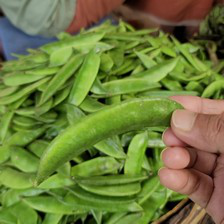

In [5]:
image = Image.open("/content/data/Vegetable Images/validation/Bean/0024.jpg")
image

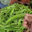

In [6]:
image = image.resize((32,32))
image

**Creating a function for prediction of model**


In [7]:
def Pred(final):
  image = Image.open(final)
  image = image.resize((32,32))
  test = tf.reshape(tf.constant(np.array(image)/255), (-1,32,32,3))
  preds = model.predict(test, verbose=False)[0]*100
  preds = tf.math.round(preds)
  confidence = tf.reduce_max(preds)
  index = int(tf.where(preds == confidence)[0][0])
  pred = classes[index]
  return f"The type of vegetable is {pred.title()} and it's confidence is {int(confidence)}%"

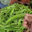

In [9]:
img = Image.open("/content/data/Vegetable Images/validation/Bean/0024.jpg")
img = img.resize((32,32))
img

In [10]:
Pred("/content/data/Vegetable Images/validation/Bean/0024.jpg")

"The type of vegetable is Bean and it's confidence is 10%"

In [13]:
Pred("/content/data/Vegetable Images/validation/Carrot/1201.jpg")

"The type of vegetable is Carrot and it's confidence is 100%"

In [14]:
Pred("/content/data/Vegetable Images/validation/Carrot/1266.jpg")


"The type of vegetable is Carrot and it's confidence is 100%"

In [15]:
Pred("/content/data/Vegetable Images/validation/Brinjal/1195.jpg")

"The type of vegetable is Brinjal and it's confidence is 100%"